# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

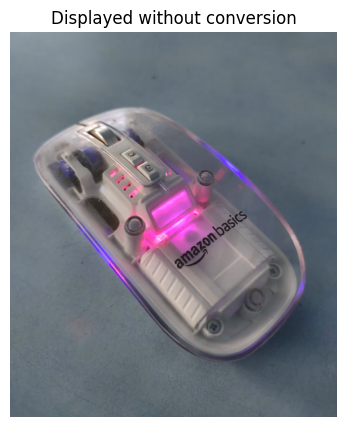

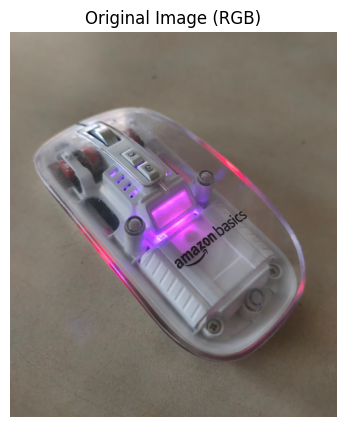

In [17]:
# 1. Display it in RGB

import numpy as np
import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread("uk_image.jpg")

# Display it WITHOUT converting
plt.figure(figsize=(5,5))
plt.imshow(img_bgr)
plt.title("Displayed without conversion")
plt.axis("off")
plt.show()

# converting
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title("Original Image (RGB)")
plt.axis("off")
plt.show()

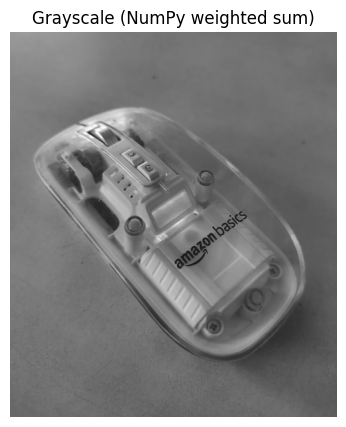

In [18]:
# 2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )
gray_np = (
    0.299 * img_rgb[:,:,0] +
    0.587 * img_rgb[:,:,1] +
    0.114 * img_rgb[:,:,2]
)

# Converting
gray_np = gray_np.astype(np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(gray_np, cmap="gray")
plt.title("Grayscale (NumPy weighted sum)")
plt.axis("off")
plt.show()


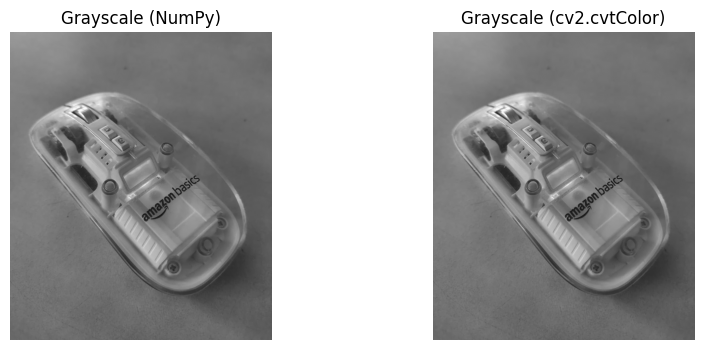

In [19]:
# 3. Use the cvtColor function to do the same and compare results

gray_cv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# for displaying both images side by side
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray_np, cmap="gray")
plt.title("Grayscale (NumPy)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray_cv, cmap="gray")
plt.title("Grayscale (cv2.cvtColor)")
plt.axis("off")

plt.show()


In [20]:
# 4. Print the array shapes of both the RGB and grayscale images

print("RGB image shape:", img_rgb.shape)
print("Grayscale (NumPy) shape:", gray_np.shape)
print("Grayscale (OpenCV) shape:", gray_cv.shape)


RGB image shape: (1280, 1087, 3)
Grayscale (NumPy) shape: (1280, 1087)
Grayscale (OpenCV) shape: (1280, 1087)


In [21]:
# 5. Print a few pixel values of both

coords = [(0,0), (50,50), (100,100)]

print("Pixel values at selected locations:\n")

for (r,c) in coords:
    print(f"Pixel at ({r},{c})")
    print(" RGB value:", img_rgb[r,c])
    print(" Grayscale (NumPy):", gray_np[r,c])
    print(" Grayscale (cv2):", gray_cv[r,c])
    print("-"*40)


Pixel values at selected locations:

Pixel at (0,0)
 RGB value: [164 152 138]
 Grayscale (NumPy): 153
 Grayscale (cv2): 154
----------------------------------------
Pixel at (50,50)
 RGB value: [157 150 134]
 Grayscale (NumPy): 150
 Grayscale (cv2): 150
----------------------------------------
Pixel at (100,100)
 RGB value: [150 140 128]
 Grayscale (NumPy): 141
 Grayscale (cv2): 142
----------------------------------------


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [22]:
# B1. Compute the FFT of the grayscale image ( use NumPy )

import numpy as np
import matplotlib.pyplot as plt

# making sure that grayscale is in float (FFT works best in float)
gray = gray_np.astype(np.float32)

# B1 Step 1 - 2D FFT
F = np.fft.fft2(gray)

# B1 Step 2 - Shift zero-frequency component to the center
fshift = np.fft.fftshift(F)

print("FFT done.")
print("F shape:", F.shape)
print("fshift shape:", fshift.shape)


FFT done.
F shape: (1280, 1087)
fshift shape: (1280, 1087)


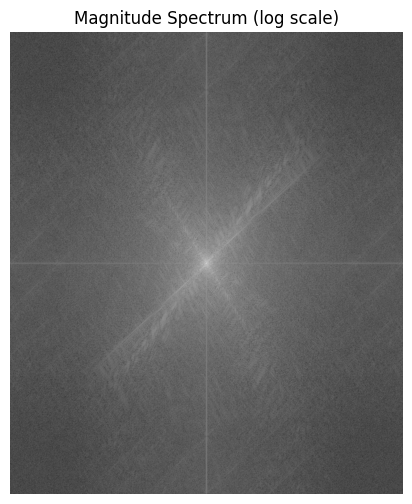

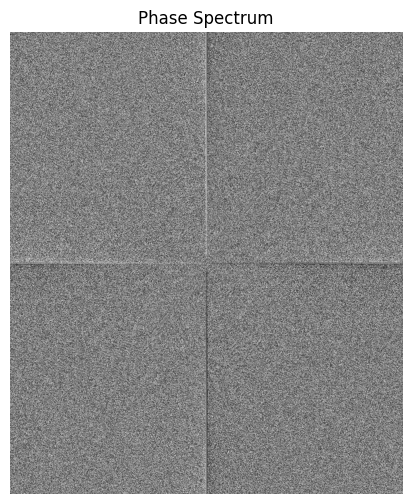

In [23]:
# B2. Compute magnitude, phase and display Magnitude Spectrum

magnitude = np.abs(fshift)
phase = np.angle(fshift)

mag_spectrum = np.log(magnitude + 1)  # +1 avoids log(0)

# Displaying magnitude spectrum (log)
plt.figure(figsize=(6,6))
plt.imshow(mag_spectrum, cmap="gray")
plt.title("Magnitude Spectrum (log scale)")
plt.axis("off")
plt.show()

# Displaying phase image too
plt.figure(figsize=(6,6))
plt.imshow(phase, cmap="gray")
plt.title("Phase Spectrum")
plt.axis("off")
plt.show()


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

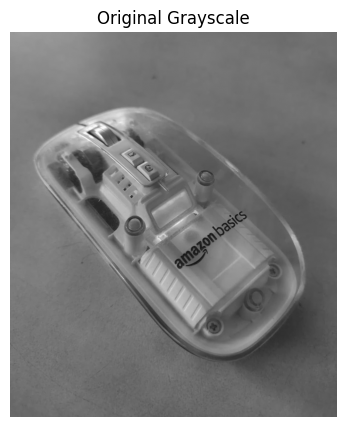

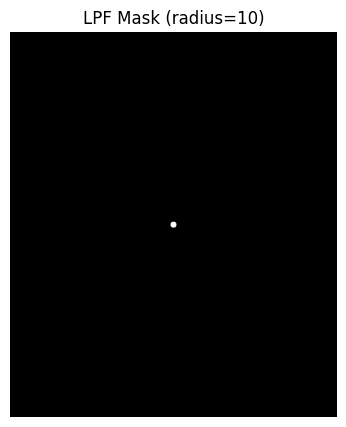

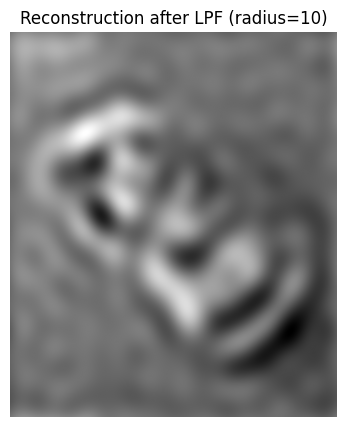

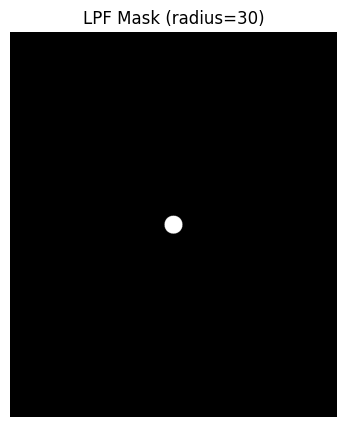

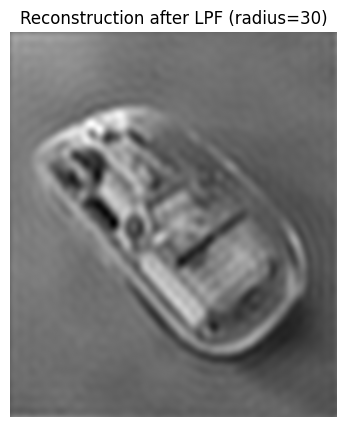

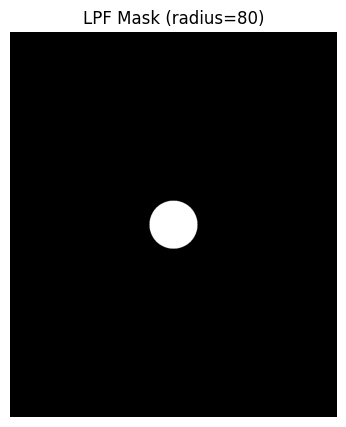

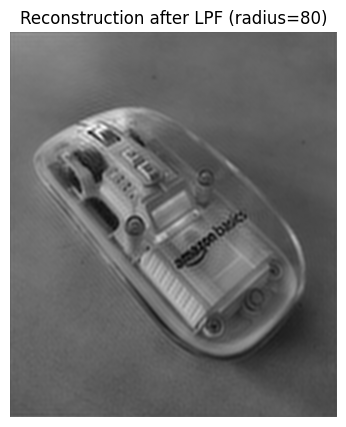

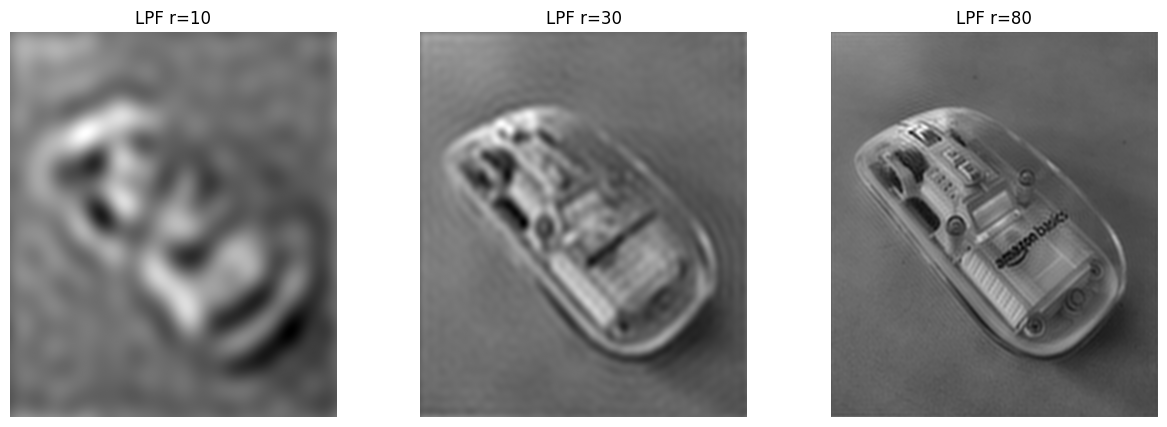

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

gray = gray.astype(np.float32)

rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2

def reconstruct_from_fshift(fshift_filtered):
    """Inverse shift -> inverse FFT -> magnitude image (real output)"""
    ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(ishift)
    img_back = np.abs(img_back)
    return img_back

def show(title, img, cmap="gray", figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Showing original grayscale once
show("Original Grayscale", gray)


# C1. Create 3 LPF masks (r = 10, 30, 80)

radii = [10, 30, 80]
lpf_outputs = []

for r in radii:
    # 1) Create circular LPF mask
    mask_lpf = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask_lpf, (ccol, crow), r, 1, -1)

    # 2) Apply to fshift
    fshift_lpf = fshift * mask_lpf

    # 3) Reconstruct
    img_lpf = reconstruct_from_fshift(fshift_lpf)
    lpf_outputs.append(img_lpf)

    # 4) Display
    show(f"LPF Mask (radius={r})", mask_lpf)
    show(f"Reconstruction after LPF (radius={r})", img_lpf)

    # Reason
    # Smaller radius => keeps fewer low frequencies only => removes more high-frequency details (edges/textures) => image becomes more blurred as radius decreases.

# showing all LPF outputs together for comparison
plt.figure(figsize=(15,5))
for i, r in enumerate(radii):
    plt.subplot(1, 3, i+1)
    plt.imshow(lpf_outputs[i], cmap="gray")
    plt.title(f"LPF r={r}")
    plt.axis("off")
plt.show()



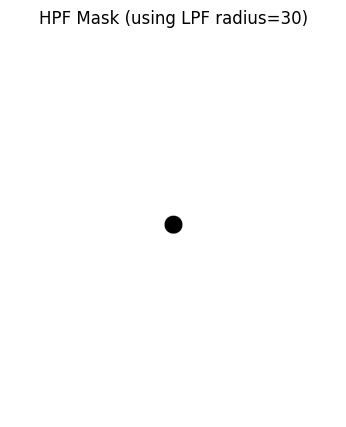

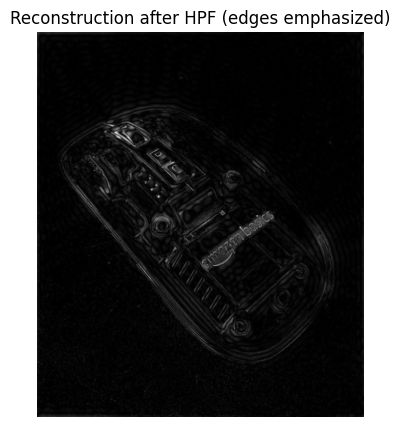

In [28]:

# C2. Create HPF mask

# HPF = 1 - LPF (removes low frequencies, keeps edges)
r_hpf = 30
mask_lpf_hpf = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lpf_hpf, (ccol, crow), r_hpf, 1, -1)

mask_hpf = 1 - mask_lpf_hpf

fshift_hpf = fshift * mask_hpf
img_hpf = reconstruct_from_fshift(fshift_hpf)

show(f"HPF Mask (using LPF radius={r_hpf})", mask_hpf)
show("Reconstruction after HPF (edges emphasized)", img_hpf)



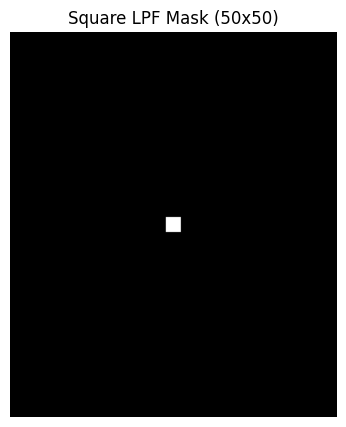

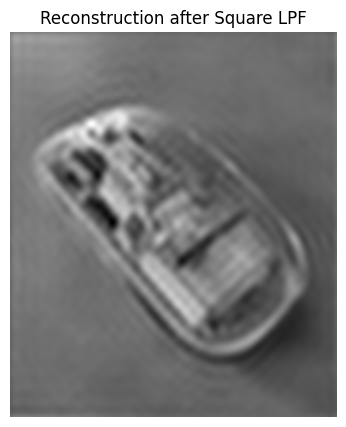

In [29]:
# C3. Create a square LPF mask (side = 50) at center

side = 50
half = side // 2

mask_sq = np.zeros((rows, cols), np.uint8)
mask_sq[crow-half:crow+half, ccol-half:ccol+half] = 1

fshift_sq = fshift * mask_sq
img_sq = reconstruct_from_fshift(fshift_sq)

show("Square LPF Mask (50x50)", mask_sq)
show("Reconstruction after Square LPF", img_sq)



## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

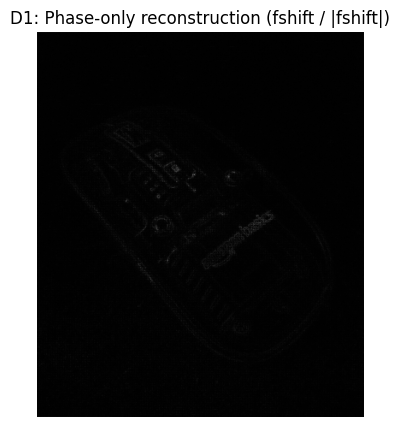

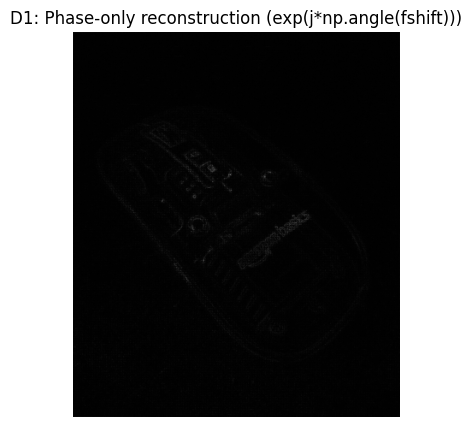

In [30]:
# D1. Phase-only reconstruction

import numpy as np
import matplotlib.pyplot as plt

def reconstruct_from_fshift(fshift_filtered):
    """Inverse shift -> inverse FFT -> magnitude image"""
    ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(ishift)
    img_back = np.abs(img_back)
    return img_back

def show(title, img, cmap="gray", figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

eps = 1e-8  # small number to avoid divide-by-zero

'''
# Difference vs lecture line: np.angle(fshift)
   - np.angle(fshift) returns ONLY phase angles (a real-valued matrix in radians).
   - phase_only here keeps COMPLEX coefficients e^(j*phase), which are needed for inverse FFT reconstruction.
'''
phase_only = fshift / (np.abs(fshift) + eps)

img_phase_only = reconstruct_from_fshift(phase_only)
show("D1: Phase-only reconstruction (fshift / |fshift|)", img_phase_only)

# Try reconstruction from np.angle(fshift)
phase_angles = np.angle(fshift)

# np.angle(fshift) gives only angles, not a valid complex Fourier spectrum by itself.
# To reconstruct, we must convert angles -> complex unit phasors: exp(j*angle)
phase_from_angle = np.exp(1j * phase_angles)

img_phase_from_angle = reconstruct_from_fshift(phase_from_angle)
show("D1: Phase-only reconstruction (exp(j*np.angle(fshift)))", img_phase_from_angle)

# Output explanation (write in code comment):
# Both reconstructions look very similar because both contain only phase information (unit magnitude).
# Phase preserves most structural information (edges, shapes), so you still see the main objects.




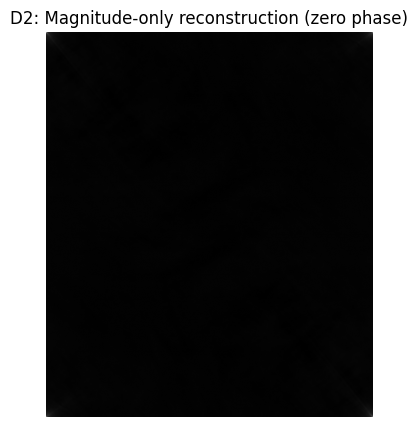

'\nRole of logarithm in Magnitude Spectrum:\n- |F| has huge dynamic range (some values are extremely large, most are tiny).\n- log(|F|+1) compresses the range so we can VISUALLY see details in the spectrum plot.\n\nWhy magnitude-only reconstruction looks different than Magnitude Spectrum plot:\n- Magnitude spectrum image you saw was a VISUALIZATION (log-scaled) of frequency magnitudes.\n- Here we are reconstructing a SPATIAL image using raw magnitude with zero phase.\n- Since phase carries spatial alignment/structure, magnitude-only reconstruction loses clear shapes\n  and usually looks like a blurry blob/noisy pattern.\n'

In [31]:
# D2. Magnitude-only reconstruction

mag_only = np.abs(fshift)

mag_only_complex = mag_only.astype(np.complex64)

img_mag_only = reconstruct_from_fshift(mag_only_complex)
show("D2: Magnitude-only reconstruction (zero phase)", img_mag_only)

'''
Role of logarithm in Magnitude Spectrum:
- |F| has huge dynamic range (some values are extremely large, most are tiny).
- log(|F|+1) compresses the range so we can VISUALLY see details in the spectrum plot.

Why magnitude-only reconstruction looks different than Magnitude Spectrum plot:
- Magnitude spectrum image you saw was a VISUALIZATION (log-scaled) of frequency magnitudes.
- Here we are reconstructing a SPATIAL image using raw magnitude with zero phase.
- Since phase carries spatial alignment/structure, magnitude-only reconstruction loses clear shapes
  and usually looks like a blurry blob/noisy pattern.
'''

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

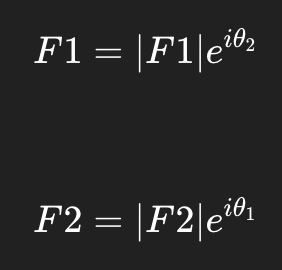

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

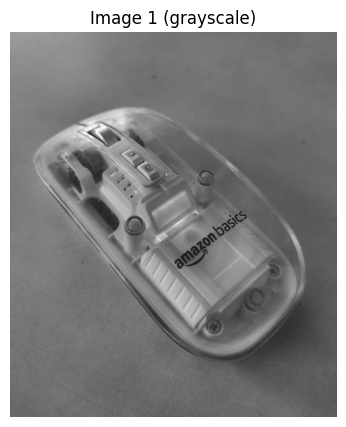

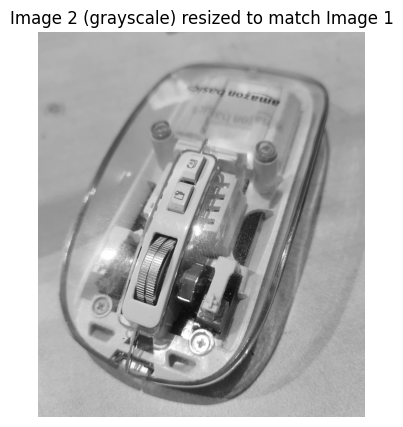

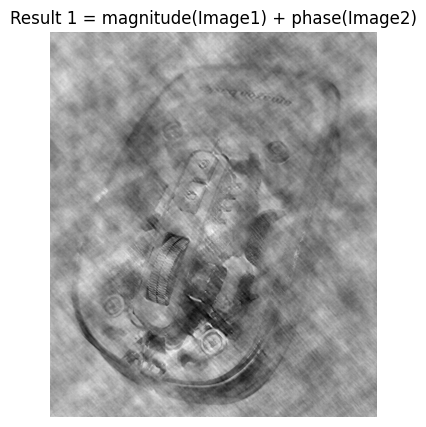

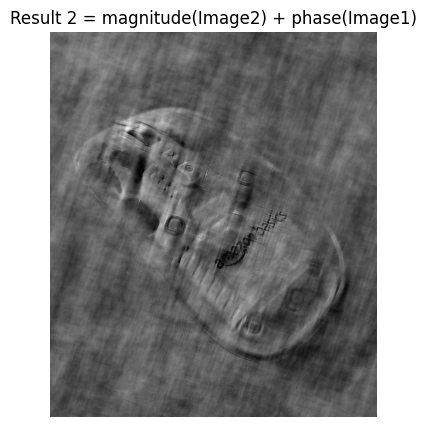

'\nobservation :\nPhase mainly carries STRUCTURE/SHAPE (spatial arrangement), while magnitude influences TEXTURE/contrast strength.\nAfter swapping, the output usually looks like the image whose PHASE was used, showing phase is dominant for structure.\n'

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show(title, img, cmap="gray", figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

def to_gray_float(img_rgb):
    """RGB -> grayscale using weighted sum (lecture style), returns float32"""
    return (0.299*img_rgb[:,:,0] + 0.587*img_rgb[:,:,1] + 0.114*img_rgb[:,:,2]).astype(np.float32)

def fft_shift(gray):
    """FFT2 + FFTSHIFT"""
    F = np.fft.fft2(gray)
    return np.fft.fftshift(F)

def reconstruct_from_shift(Fshift):
    """IFFTSHIFT + IFFT2 + abs"""
    ishift = np.fft.ifftshift(Fshift)
    img_back = np.fft.ifft2(ishift)
    return np.abs(img_back)

# 1. first image
img1_rgb = img_rgb.copy()
gray1 = to_gray_float(img1_rgb)

# 2. second image

img2_bgr = cv2.imread("uk2_image.jpg")
if img2_bgr is None:
    raise FileNotFoundError("Second image not found. Check the filename/path in cv2.imread().")

img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
gray2 = to_gray_float(img2_rgb)

h, w = gray1.shape
gray2 = cv2.resize(gray2, (w, h), interpolation=cv2.INTER_AREA)

show("Image 1 (grayscale)", gray1)
show("Image 2 (grayscale) resized to match Image 1", gray2)

# 3. FFT -> magnitude and phase for both
F1 = fft_shift(gray1)
F2 = fft_shift(gray2)

mag1, phase1 = np.abs(F1), np.angle(F1)
mag2, phase2 = np.abs(F2), np.angle(F2)

# 4. Swap magnitude and phase, then reconstruct
# F_new1 = |F1| * exp(j * phase2)
# F_new2 = |F2| * exp(j * phase1)

F_new1 = mag1 * np.exp(1j * phase2)
F_new2 = mag2 * np.exp(1j * phase1)

img_new1 = reconstruct_from_shift(F_new1)
img_new2 = reconstruct_from_shift(F_new2)

# results
show("Result 1 = magnitude(Image1) + phase(Image2)", img_new1)
show("Result 2 = magnitude(Image2) + phase(Image1)", img_new2)

'''
observation :
Phase mainly carries STRUCTURE/SHAPE (spatial arrangement), while magnitude influences TEXTURE/contrast strength.
After swapping, the output usually looks like the image whose PHASE was used, showing phase is dominant for structure.
'''